In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

# Import the 'resample' function from sklearn.utils for resampling (upsampling or downsampling) data
from sklearn.utils import resample


# Preprocessing techniques like transformation and encoding
from sklearn.preprocessing import PowerTransformer, OneHotEncoder

# For applying transformations to columns
from sklearn.compose import ColumnTransformer

# Pipeline construction for simplifying workflow
from sklearn.pipeline import Pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split

# Various machine learning classifiers for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Additional classifiers from lightgbm, xgboost, and catboost libraries
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

# Evaluation metrics for classification model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv


In [2]:
# read in all our data
data = pd.read_csv("../input/hr-analytics-prediction/HR-Employee-Attrition.csv")

# set seed for reproducibility
np.random.seed(0) 

In [3]:
# look at the first five rows of the nfl_data file. 

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:-1]

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

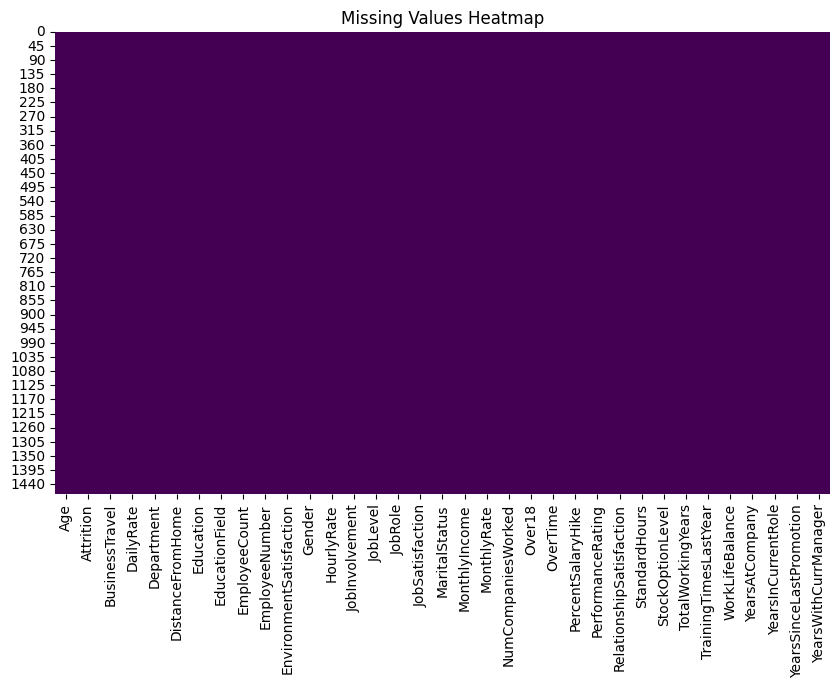

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
# check accident data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Summary statistics
print(data.describe(include='all'))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

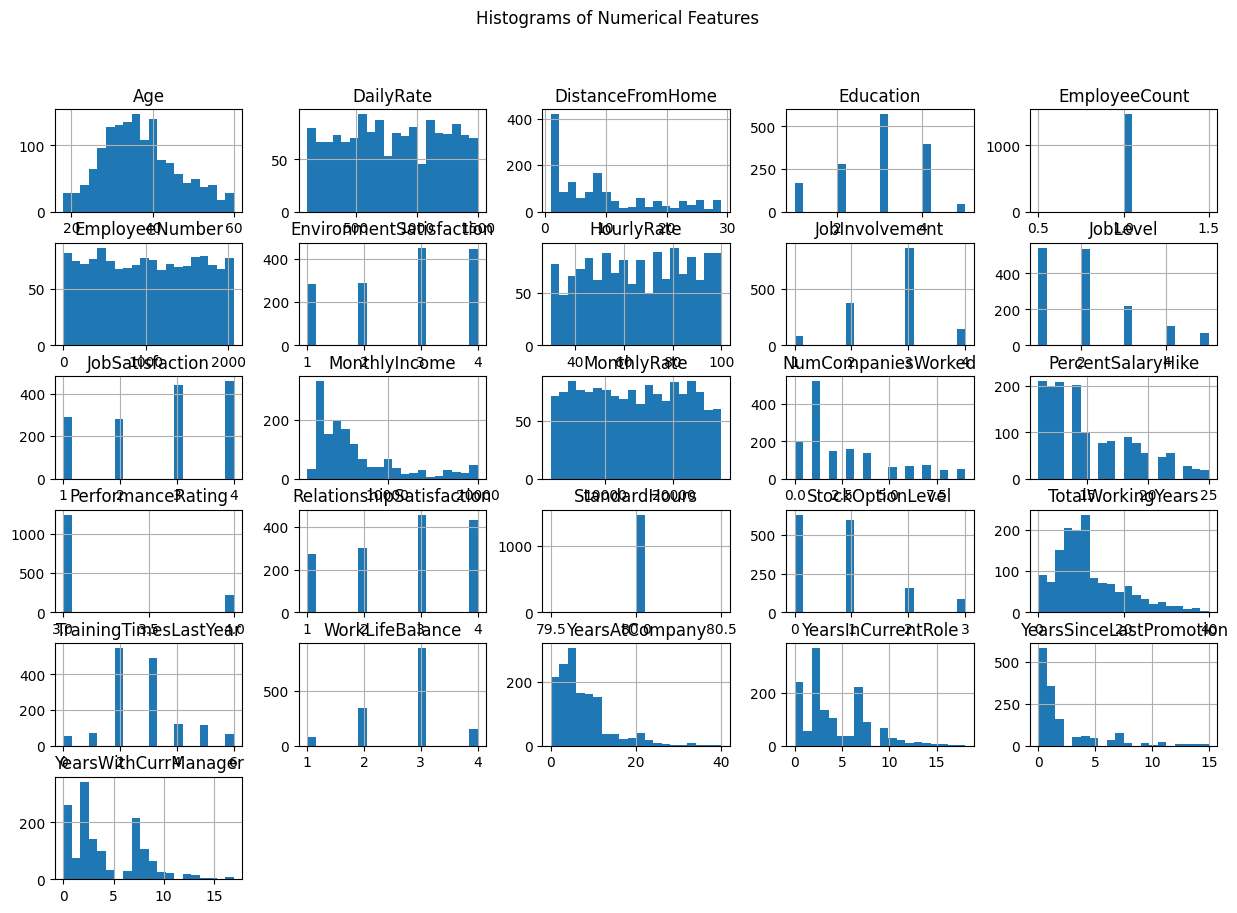

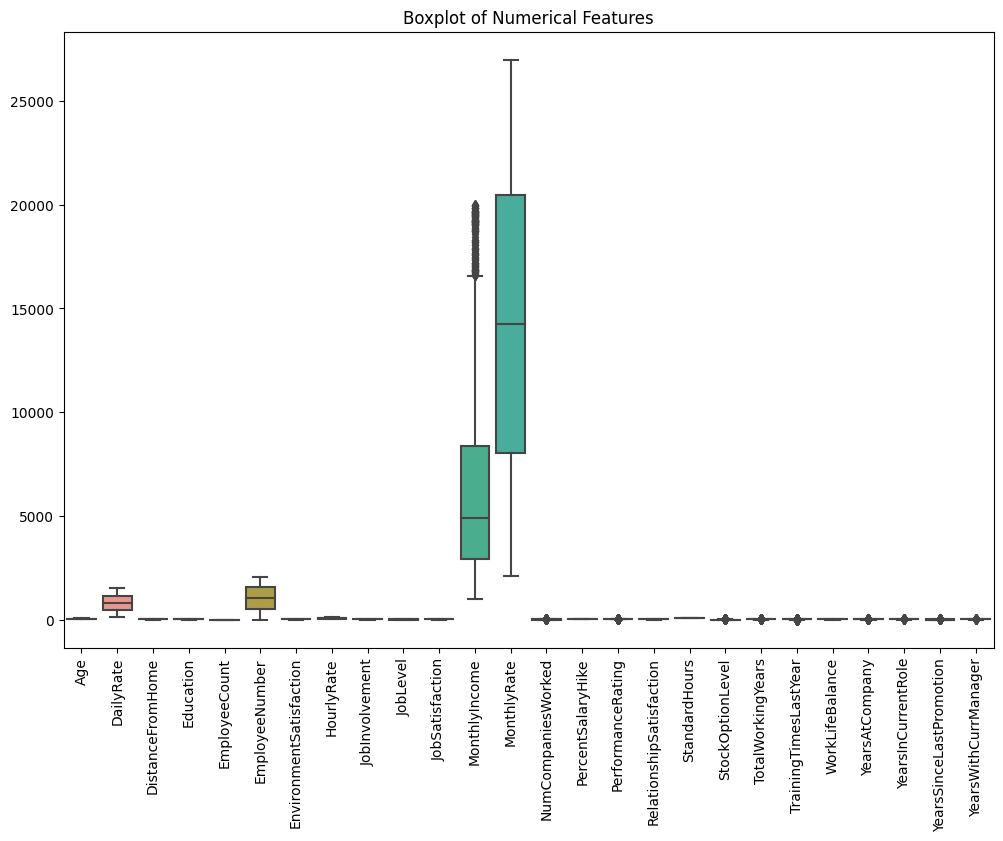

In [8]:
# Histograms for numerical features
data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplot for numerical features to check outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=np.number))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()


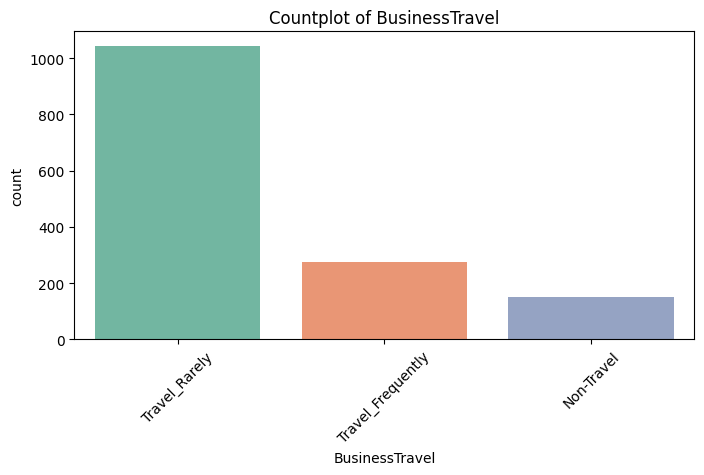

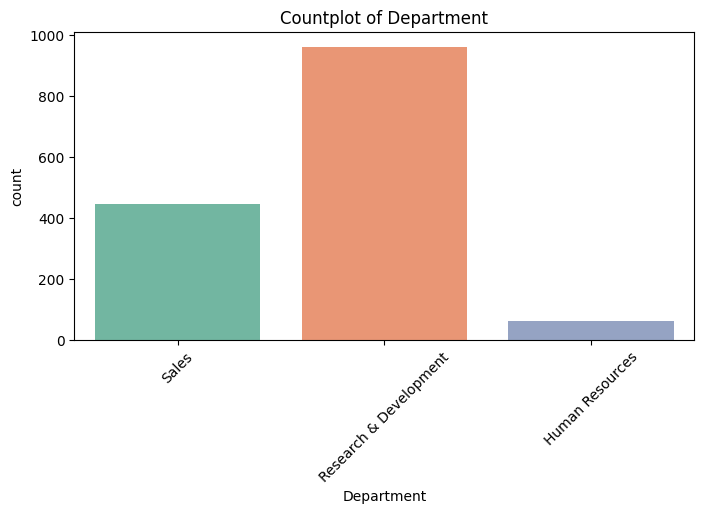

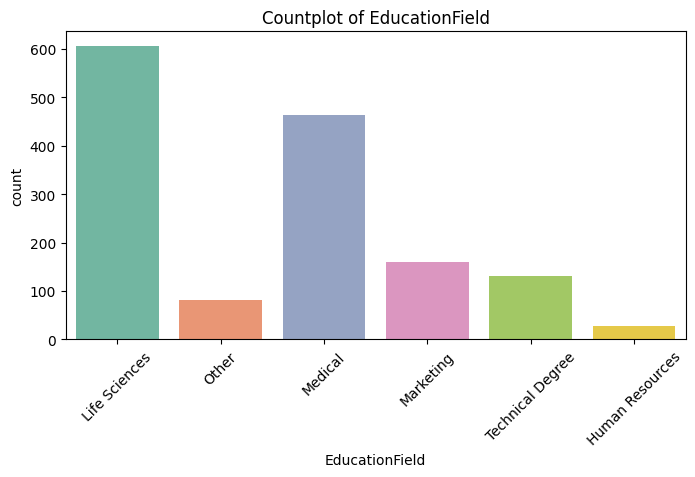

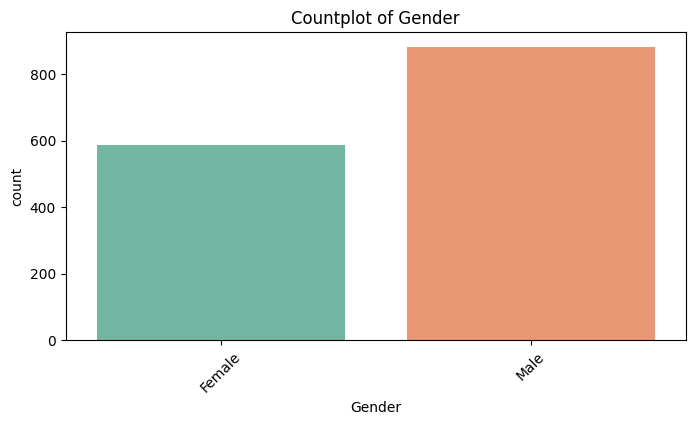

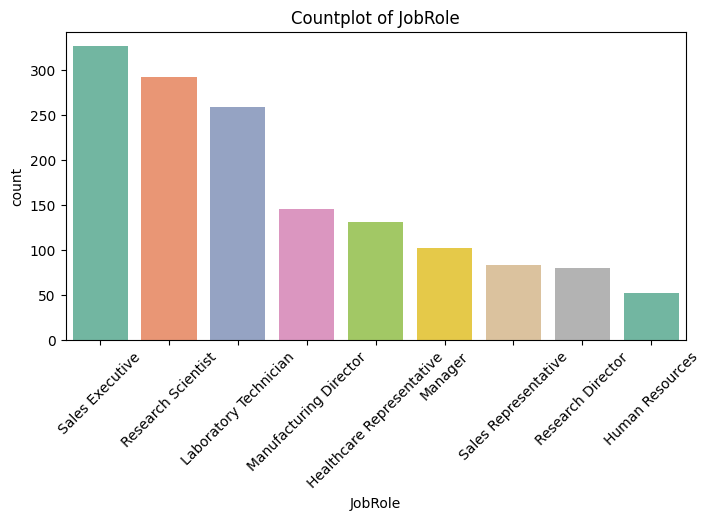

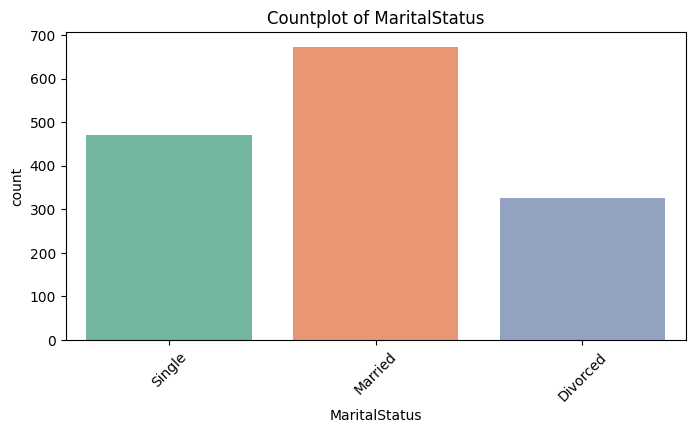

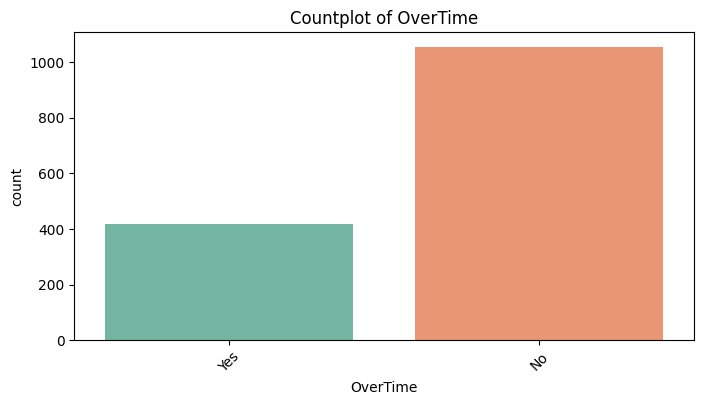

In [9]:
# Bar plots for categorical features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Multivariate Analysis
# Pairplot for Key Features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

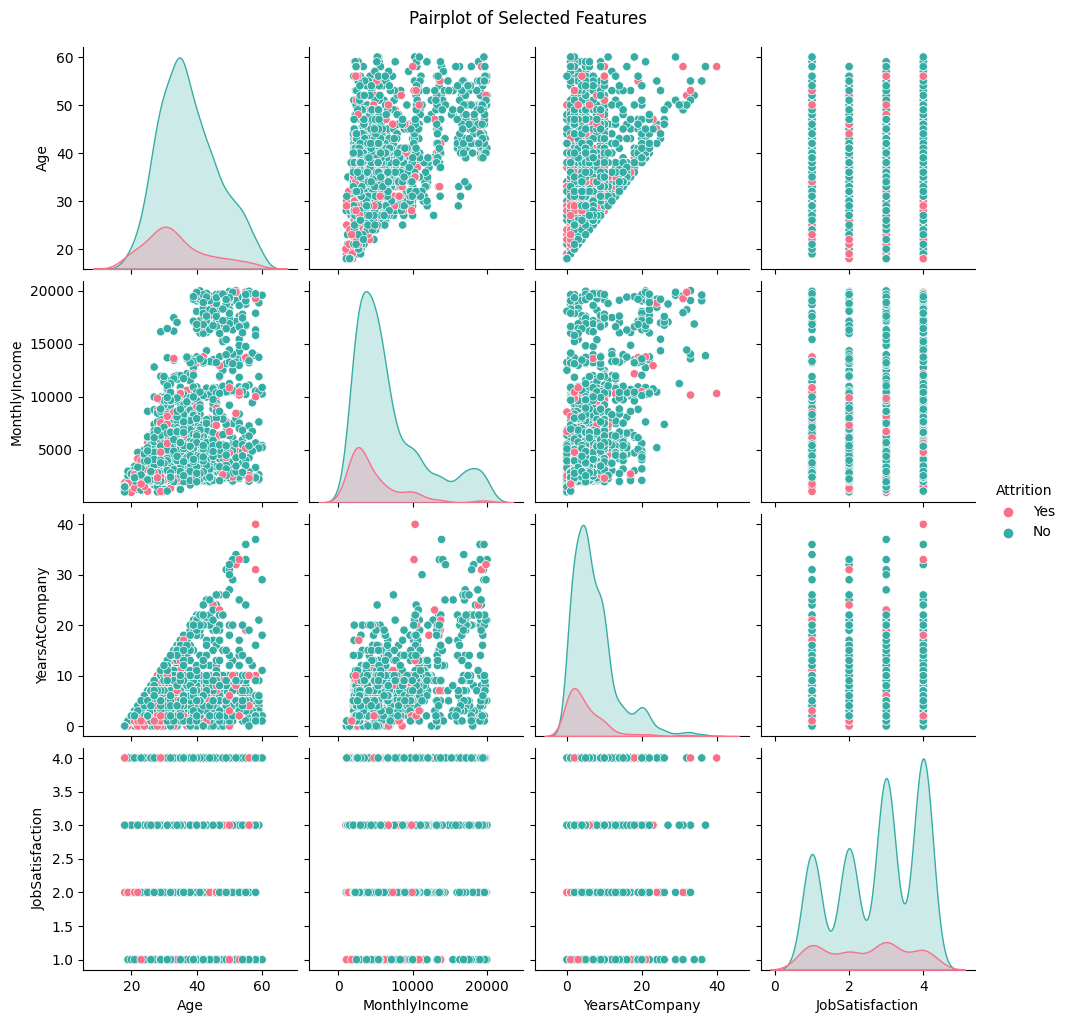

In [12]:
# Select a subset of numerical features for pairplot
selected_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'Attrition']

sns.pairplot(data[selected_features], hue='Attrition', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


In [14]:
# Count of attrition and non-attrition
print(data['Attrition'].value_counts())

# Attrition percentage
attrition_percentage = data['Attrition'].value_counts(normalize=True) * 100
print(f"Attrition Percentage:\n{attrition_percentage}")


Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition Percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
# List of categorical features to analyze
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for feature in categorical_features:
    attrition_rate = data.groupby(feature)['Attrition'].value_counts(normalize=True).unstack() * 100
    print(f"Attrition Rate by {feature}:\n{attrition_rate}\n")
    
    # Visualize attrition rates
    attrition_rate['Yes'].plot(kind='bar', figsize=(8, 4), color='skyblue')
    plt.title(f"Attrition Rate by {feature}")
    plt.ylabel("Attrition Rate (%)")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition', y=feature, data=data, palette='Set3')
    plt.title(f"{feature} vs Attrition")
    plt.show()


In [ ]:
# Encode Attrition as 0 (No) and 1 (Yes) for correlation analysis
data['Attrition_Encoded'] = data['Attrition'].map({'No': 0, 'Yes': 1})

# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix['Attrition_Encoded'].sort_values(ascending=False))

# Heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
